In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 84 kB/s 


In [3]:
import numpy as np

# 다중 손잡이 밴딧 문제 설정
arms_profit=[0.4, 0.12, 0.52, 0.6, 0.25]
n_arms=len(arms_profit)

n_trial=10000 # 손잡이를 당기는 횟수(에피소드 길이)

# 손잡이 당기는 행위를 시뮬레이션하는 함수(handle은 손잡이 번호)
def pull_bandit(handle):
    q=np.random.random()
    if q<arms_profit[handle]:
        return 1
    else:
        return -1

# 랜덤 정책을 모방하는 함수
def random_exploration():
    episode=[]
    num=np.zeros(n_arms) # 손잡이별로 당긴 횟수
    wins=np.zeros(n_arms) # 손잡이별로 승리 횟수
    for i in range(n_trial):
        h=np.random.randint(0,n_arms)
        reward=pull_bandit(h)
        episode.append([h,reward])
        num[h]+=1
        wins[h]+=1 if reward==1 else 0
    return episode, (num,wins)

e,r=random_exploration()

print("손잡이별 승리 확률:", ["%6.4f"% (r[1][i]/r[0][i]) if r[0][i]>0 else 0.0 for i in range(n_arms)])
print("손잡이별 수익($):",["%d"% (2*r[1][i]-r[0][i]) for i in range(n_arms)])
print("순 수익($):",sum(np.asarray(e)[:,1]))

# ε-탐욕을 구현하는 함수
def epsilon_greedy(eps):
    episode=[]
    num=np.zeros(n_arms) # 손잡이별로 당긴 횟수
    wins=np.zeros(n_arms) # 손잡이별로 승리 횟수
    for i in range(n_trial):
        r=np.random.random()
        if(r<eps or sum(wins)==0): # 확률 eps로 임의 선택
            h=np.random.randint(0,n_arms)
        else:
            prob=np.asarray([wins[i]/num[i] if num[i]>0 else 0.0 for i in range(n_arms)])
            prob=prob/sum(prob)
            h=np.random.choice(range(n_arms),p=prob)
        reward=pull_bandit(h)
        episode.append([h,reward])
        num[h]+=1
        wins[h]+=1 if reward==1 else 0
    return episode, (num,wins)

e,r=epsilon_greedy(0.1)

print("손잡이별 승리 확률:", ["%6.4f"% (r[1][i]/r[0][i]) if r[0][i]>0 else 0.0 for i in range(n_arms)])
print("손잡이별 수익($):",["%d"% (2*r[1][i]-r[0][i]) for i in range(n_arms)])
print("순 수익($):",sum(np.asarray(e)[:,1]))

손잡이별 승리 확률: ['0.3838', '0.1306', '0.4960', '0.6090', '0.2552']
손잡이별 수익($): ['-444', '-1499', '-16', '430', '-1015']
순 수익($): -2544
손잡이별 승리 확률: ['0.4085', '0.1465', '0.5127', '0.5993', '0.2643']
손잡이별 수익($): ['-389', '-608', '64', '595', '-708']
순 수익($): -1046


In [4]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

pygame 2.1.0 (SDL 2.0.16, Python 3.7.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


<Surface(640x480x32 SW)>

In [5]:
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

!pip install gym pyvirtualdisplay > /dev/null 2>&1

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym

Discrete(16)
Discrete(4)
4
[[2, 0.0, 1], [3, 0.0, 1], [3, 0.0, 1], [1, 0.0, 5]]


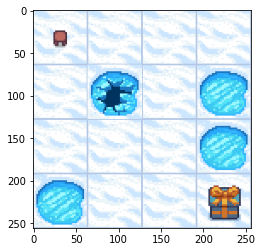

In [9]:
import gym
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()



# 환경 불러오기
env=gym.make("FrozenLake-v1",is_slippery=False)
print(env.observation_space)
print(env.action_space)

n_trial=20

# 에피소드 수집
env.reset()
episode=[]
for i in range(n_trial):
    action=env.action_space.sample() # 행동을 취함(랜덤 선택)
    obs,reward,done,info =env.step(action) # 보상을 받고 상태가 바뀜
    episode.append([action,reward,obs])  # ,동작, 보상, 새로운 상태(이동 위치)
    prev_screen = env.render(mode='rgb_array')
    plt.imshow(prev_screen)

    if done:
        break
print(len(episode))
print(episode)
env.close()

In [7]:
import gym
import numpy as np
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()


env=gym.make('FrozenLake-v1',is_slippery=False) # 환경 생성
Q=np.zeros([env.observation_space.n,env.action_space.n]) # Q 배열 초기화

rho=0.8 # 학습률
lamda=0.99 # 할인율

n_episode=2000
length_episode=100

# 최적 행동 가치 함수 찾기
for i in range(n_episode):
    s=env.reset() # 새로운 에피소드 시작
    for j in range(length_episode):
        argmaxs=np.argwhere(Q[s,:]==np.amax(Q[s,:])).flatten().tolist()
        a=np.random.choice(argmaxs)
        s1,r,done,_=env.step(a)
        Q[s,a]=Q[s,a]+rho*(r+lamda*np.max(Q[s1,:])-Q[s,a]) # 식 (9.18)
        s=s1
        if done:
            break

np.set_printoptions(precision=2)
print(Q)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


[[0.   0.   0.95 0.  ]
 [0.   0.   0.96 0.  ]
 [0.   0.97 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.98 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.5  0.  ]
 [0.   0.99 0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   0.  ]]
